In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import einops

In [ ]:
base_path='/Users/emeunier/Documents/scai/'

In [332]:
clean_images = torch.load(f'{base_path}/clean_images_2.pth', map_location='cpu')[:8]
ni = torch.load(f'{base_path}/noisy_images.pth', map_location='cpu')
#generated_images = torch.tensor(np.load('cb7xsahm/interence/infesteps_1000/20240603-235854.npy'))
#generated_images_100 = torch.tensor(np.load('cb7xsahm/interence/infesteps_100/20240603-235050.npy'))
path_generated=f'{base_path}/qeeyvkep/interence/infesteps_1000/20240604-135240.npy'
generated_images = torch.tensor(np.load('qeeyvkep/interence/infesteps_1000/20240604-135240.npy'))

In [401]:
pwd

'/Users/emeunier/Documents/scai'

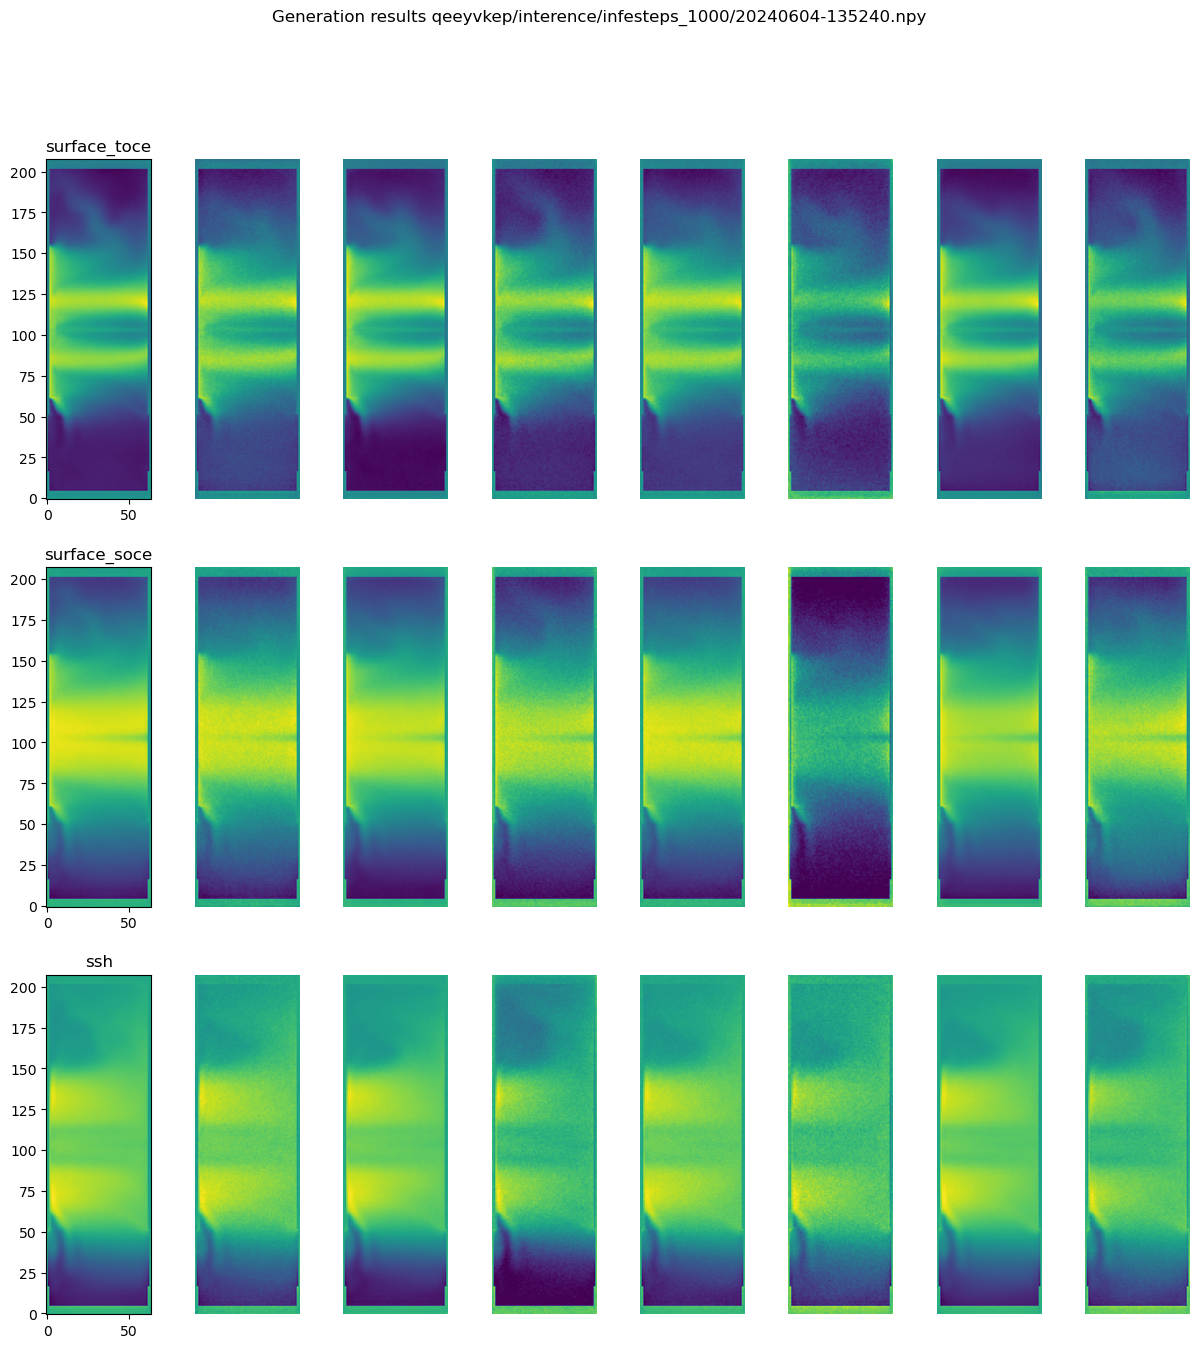

In [333]:
fig, axs = plt.subplots(3, 8, figsize=(15,15))
fig.suptitle(f'Generation results {path_generated}')
for ci, c in enumerate([(0, 'surface_toce'), (18, 'surface_soce'), (-1, 'ssh')]) : 
    for b in range(8) : 
        axs[ci, b].imshow(generated_images[b, c[0]], origin='lower')
        
        if b == 0 : 
            axs[ci, b].set_title(c[1])
        else :
            axs[ci, b].axis('off')

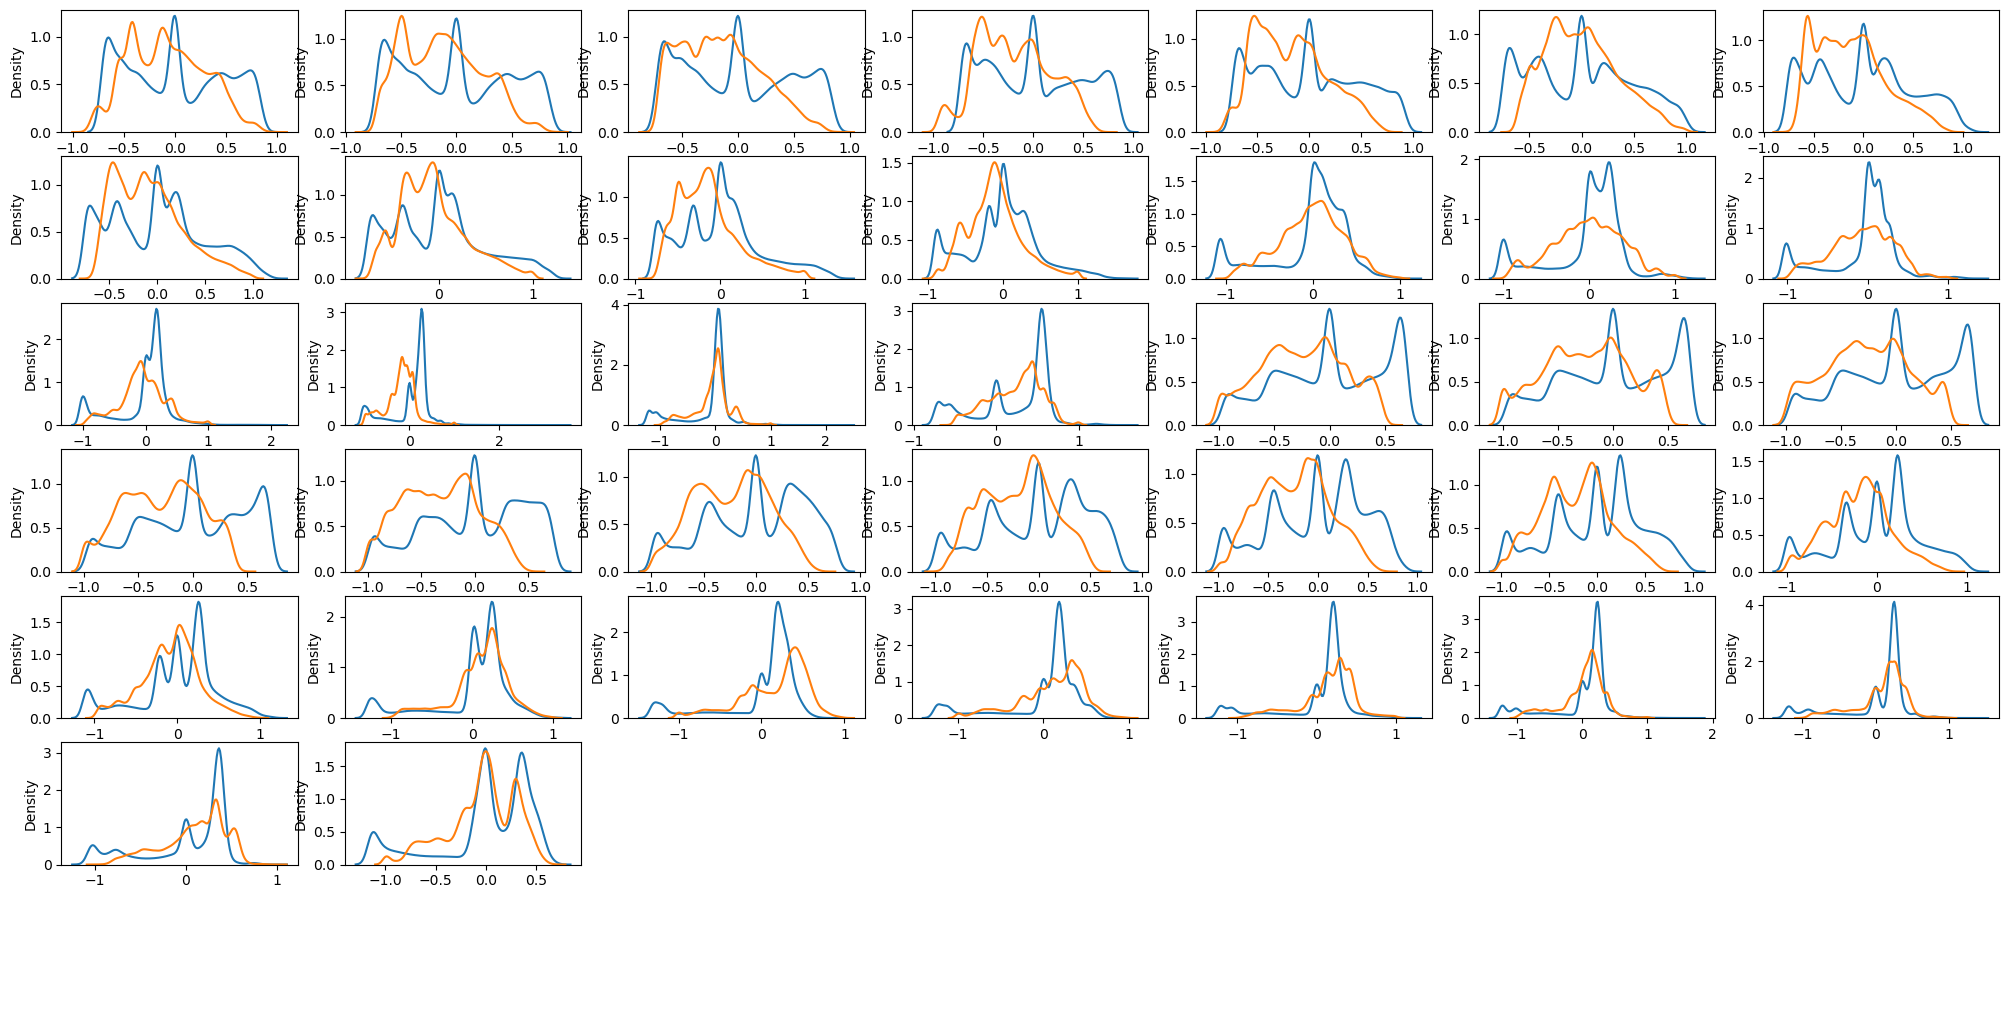

In [336]:
clean_images_flat = einops.rearrange(clean_images, 'b c i j ->c (b i j)')
generated_images_flat = einops.rearrange(generated_images, 'b c i j -> c (b i j)')

fig, ax = plt.subplots(7, 7, figsize=(25, 13))
[axi.axis('off') for axi in ax.flatten()]
for i in range(37) : 
    axi = ax[i//7, i%7]
    sns.kdeplot(clean_images_flat[i], ax=axi)
    sns.kdeplot(generated_images_flat[i], ax=axi)
    #sns.kdeplot(generated_images_100[i], ax=axi)
    axi.axis('on')

# vertical physic

In [362]:
data['toce'].mean(axis=(0, 2,3))

tensor([ 0.0052,  0.0049,  0.0042,  0.0046,  0.0052,  0.0068,  0.0039,  0.0035,
         0.0011,  0.0008, -0.0082, -0.0361, -0.0213, -0.0687, -0.0365,  0.0367,
        -0.1452,  0.1940])

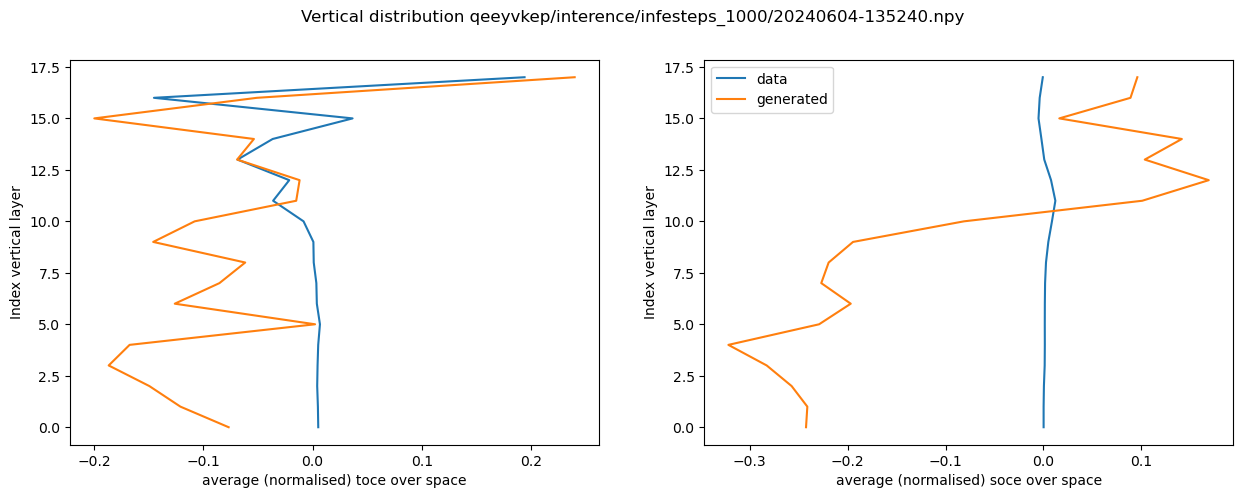

In [337]:
generated = {'toce' : generated_images[:, 0:18], 'soce' :generated_images[:, 18:36]}
data = {'toce' : clean_images[:, 0:18], 'soce' :clean_images[:, 18:36]} 
fig, axs = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle(f'Vertical distribution {path_generated}')
for i, key in enumerate(generated.keys()) :
    axs[i].plot(data[key].mean(axis=(0, 2,3)), np.arange(18), label='data')
    axs[i].plot(generated[key].mean(axis=(0, 2,3)), np.arange(18), label='generated')
    axs[i].set_xlabel(f'average (normalised) {key} over space')
    axs[i].set_ylabel('Index vertical layer')
axs[i].legend()

# Visualise full state

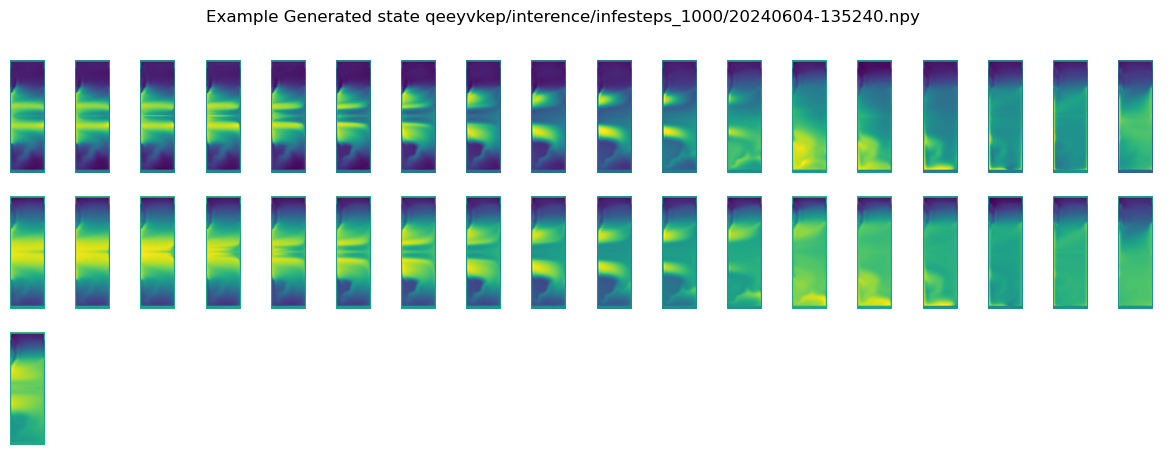

In [338]:
fig, axs = plt.subplots(3, 18, figsize=(15, 5))
fig.suptitle(f'Example Generated state {path_generated}')
axs = axs.flatten()
[ax.axis('off') for ax in axs]
for i in range(len(generated_images[0])) : 
    axs[i].imshow(generated_images[0, i])

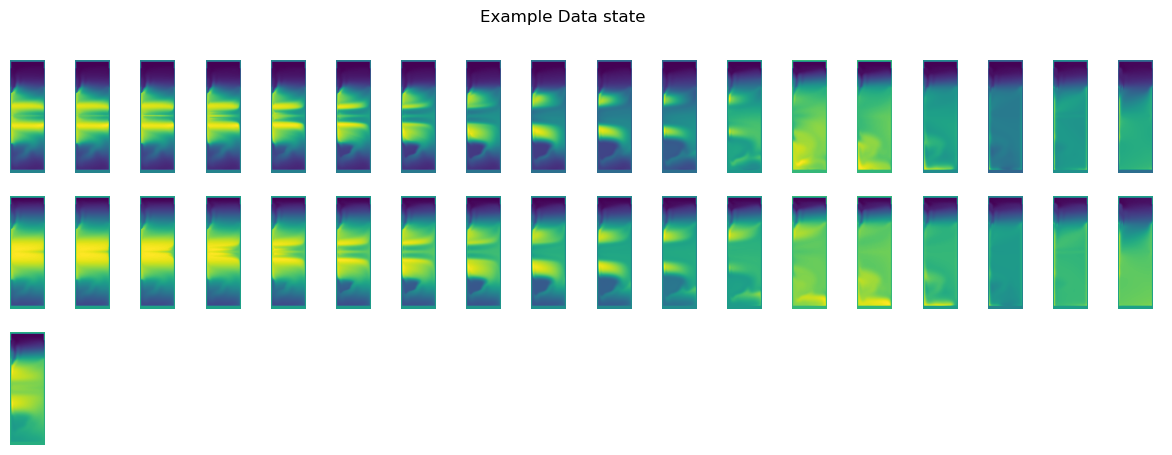

In [339]:
fig, axs = plt.subplots(3, 18, figsize=(15, 5))
fig.suptitle(f'Example Data state')
axs = axs.flatten()
[ax.axis('off') for ax in axs]
for i in range(len(clean_images[0])) : 
    axs[i].imshow(clean_images[0, i])

# Interpolate and De-normalise

In [429]:
def interpolate_double(array) : 
    """
    Take array with size (c, w, h) and return 
    array with (c*2, w, h) using interpolation to fill the 
    gaps. 
    """
    r = (array[0:-1] + array[1:]) / 2
    interleaved_tensor = rearrange([array[:-1], r], 'd c h w -> (c d) h w', d=2)
    return np.concatenate([interleaved_tensor, array[-1:]], axis=0)

In [415]:
r = (toce[0, 0:-1] + toce[0, 1:]) / 2

In [418]:
toce[0, -1:].shape

torch.Size([1, 208, 64])

torch.Size([17, 208, 64])

In [430]:
interpolate_double(np.array(toce[0]))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [405]:
toce.shape

torch.Size([8, 18, 208, 64])

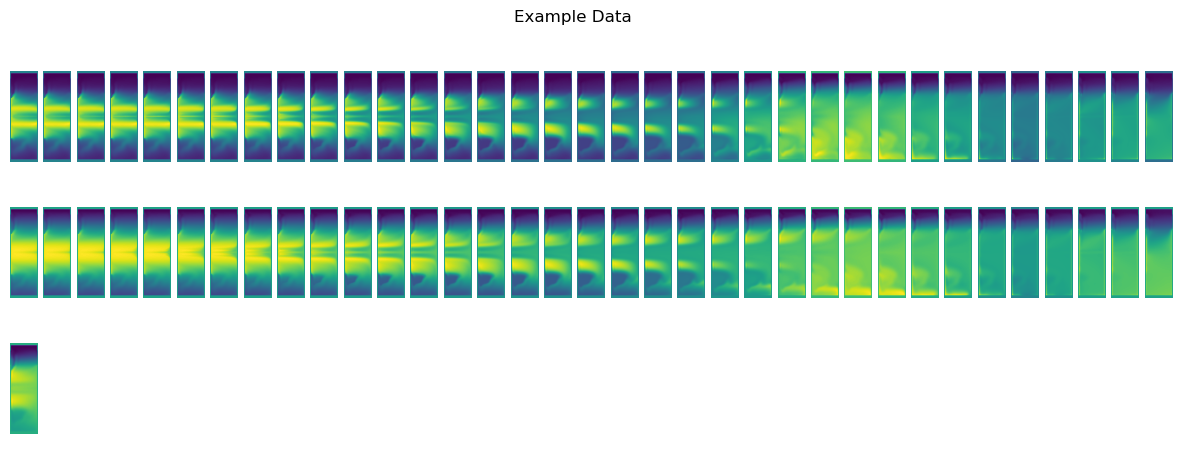

In [391]:
toce = clean_images[:,:18] 
soce = clean_images[:,18:36] 

toce_full = interpolate_double(toce) 
soce_full = interpolate_double(soce) 
ssh_full = clean_images[:,-1:]
out_full = torch.cat([toce_full, soce_full, ssh_full], axis=1)

fig, axs = plt.subplots(3, 35, figsize=(15, 5))
fig.suptitle(f'Example Data')
axs = axs.flatten()
[ax.axis('off') for ax in axs]
for i in range(len(out_full[0])) : 
    axs[i].imshow(out_full[0, i])

In [432]:
toce_gen = generated_images[:,:18] 
soce_gen = generated_images[:,18:36] 

toce_full_gen = interpolate_double(toce_gen) 
soce_full_gen = interpolate_double(soce_gen) 
ssh_full_gen = generated_images[:,-1:]
out_full_gen = torch.cat([toce_full_gen, soce_full_gen, ssh_full_gen], axis=1)

fig, axs = plt.subplots(3, 35, figsize=(15, 5))
fig.suptitle(f'Example Generated state {path_generated}')
axs = axs.flatten()
[ax.axis('off') for ax in axs]
for i in range(len(out_full_gen[0])) : 
    axs[i].imshow(out_full_gen[0, i])

EinopsError:  Error while processing rearrange-reduction pattern "d c h w -> (c d) h w".
 Input tensor shape: torch.Size([2, 7, 18, 208, 64]). Additional info: {'d': 2}.
 Wrong shape: expected 4 dims. Received 5-dim tensor.

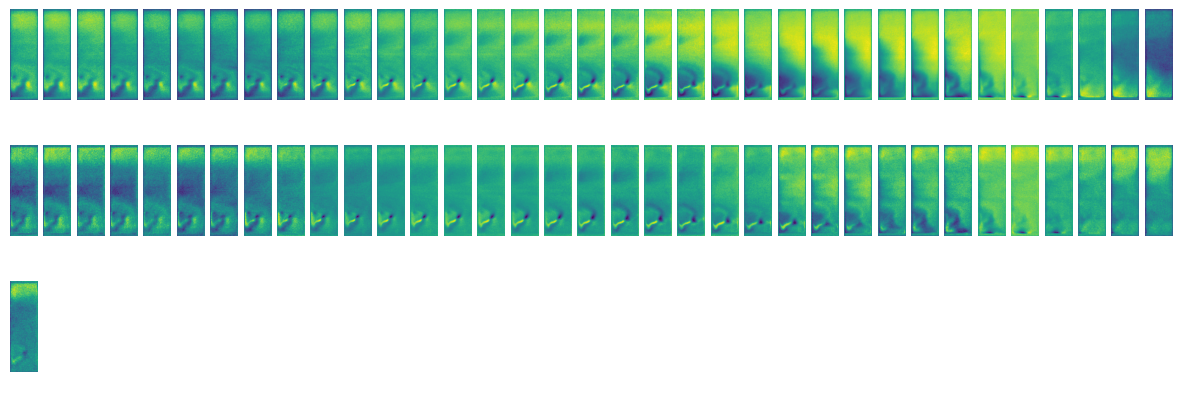

In [359]:
fig, axs = plt.subplots(3, 35, figsize=(15, 5))
axs = axs.flatten()
[ax.axis('off') for ax in axs]
for i in range(len(out_full_gen[0])) : 
    axs[i].imshow(out_full_gen[1, i] - out_full_gen[0,i])

# Re-normalise !

In [392]:
generated_state = {'toce' : toce_full_gen, 'soce': soce_full_gen, 'ssh' : ssh_full_gen}
data_state = {'toce' : toce_full, 'soce': soce_full, 'ssh' : ssh_full}

In [396]:
generated_state_unormalised = {key : unnormalise(key, val) for key, val in generated_state.items()}
data_state_unormalised = {key : unnormalise(key, val) for key, val in data_state.items()}

In [397]:
def unnormalise(key, array) : 
    
    file_path = f'{key}_info.pkl'
    
    with open(file_path, 'rb') as file:
                data = pickle.load(file)
                mu   = data["mean"]
                std  = data["std"]
                mask = data["mask"]
    array = (array * (2*std))+mu
    return array

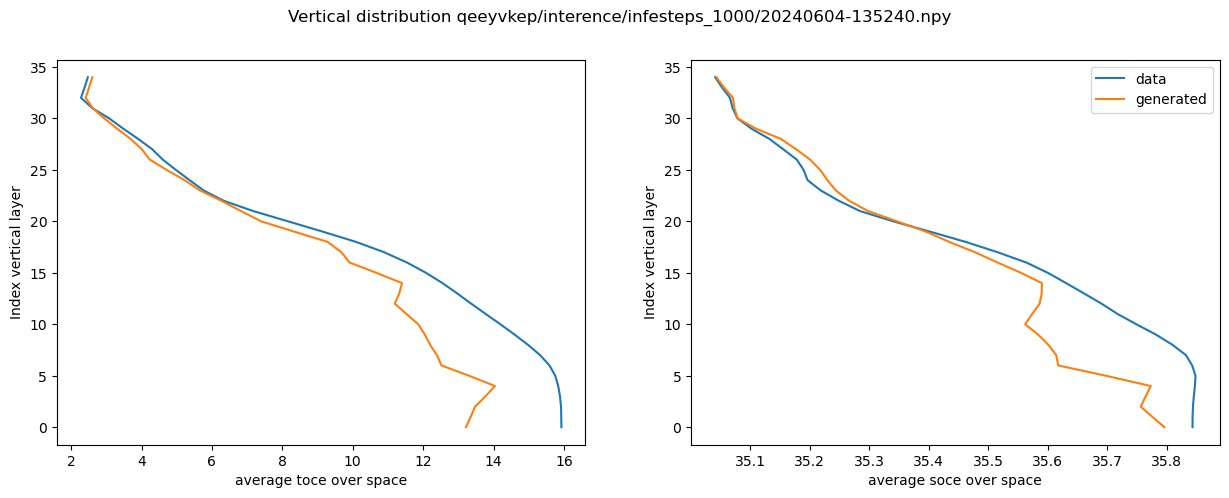

In [400]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle(f'Vertical distribution {path_generated}')
for i, key in enumerate(['toce', 'soce']) :
    axs[i].plot(data_state_unormalised[key][0].mean(axis=(1,2)), np.arange(35), label='data')
    axs[i].plot(generated_state_unormalised[key][0].mean(axis=(1,2)), np.arange(35), label='generated')
    axs[i].set_xlabel(f'average {key} over space')
    axs[i].set_ylabel('Index vertical layer')
axs[i].legend()

In [ ]:
 def standardize_4D(self,sample,feature):
            """
                Standardize the data given a mean and a std
            """
            return (sample[f'{feature}.npy'] - self.mu[feature]) / (2*self.std[feature])